## Plotting and data Visualization

Data visualization is a crucial aspect of data analysis. Visualizing your data can provide insights that are not possible by just looking at tables. When you are dealing with data, make sure to always plot your data before running any analysis. 


Matplotlib is the most commonly used package for visualization in Python. Matplotlib is tightly integrated with NumPy, Pandas, and other basic data science libraries such as SciPy and Scikit-learn. 

That said, Matplotlib is a relatively old package, it is more than 20 years old. More modern alternatives are available, including seaborn, vega-altair, and ggplot. However, most of these packages are built on top of Matplotlib, so it is easy to move between packages. 

In [2]:
#to load matplotlib you use the import function
import matplotlib as mpl #the core packge
import matplotlib.pyplot as plt #the plotter

matplotlib has many styles with different aesthetics. We typically use the `classic` style. You can lear more in the extra class content. 

When plotting with Jupyter notebooks, you have the option to generate static images, interactive plots inside the notebook, or interactive plots outside the notebook (in a new window). This can be achieved using the following magic command at the beginning of your notebook

- `%matplotlib` will lead to interactive plots in a new window
- `%matplotlib notebook` will lead to interactive plots embedded within the notebook
- `%matplotlib inline` will lead to interactive plots embedded within the notebook (this is the default option). 

We usually limit to the `inline` option. 
Note that some of these options might not work in your system, so give them a try and pick the one that works best for you. 

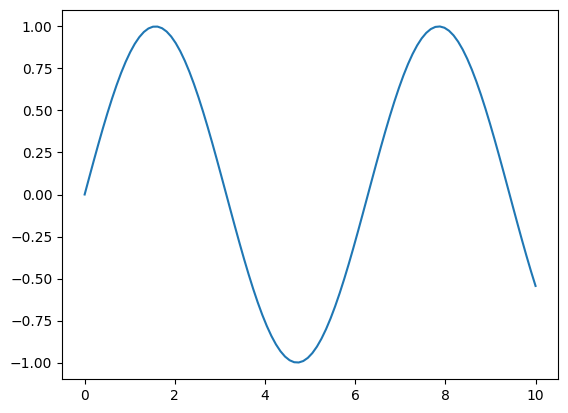

In [4]:
# Generating a plot is as simple as passing two arrays to the plot function

import numpy as np
np.set_printoptions(legacy='1.25') #this makes it easy to visualize some results, it is optional

x = np.linspace(0,10,100) #generate an array that starts at 0, and ends in 10, and has 100 elements
y = np.sin(x)
plt.plot(x,y)

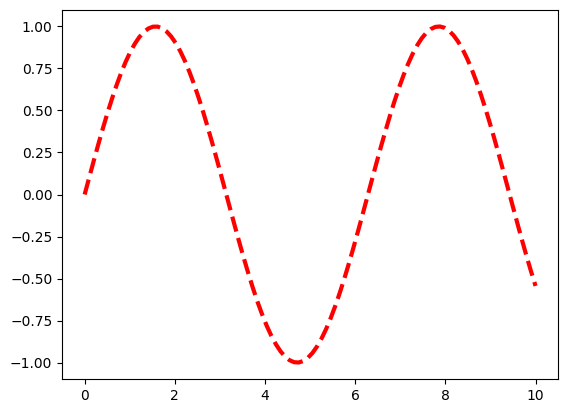

In [9]:
# You can change all aspects of the plot. Let's focus on the line color, width, and type
plt.plot(x,y,ls='--',lw=3,c='red')

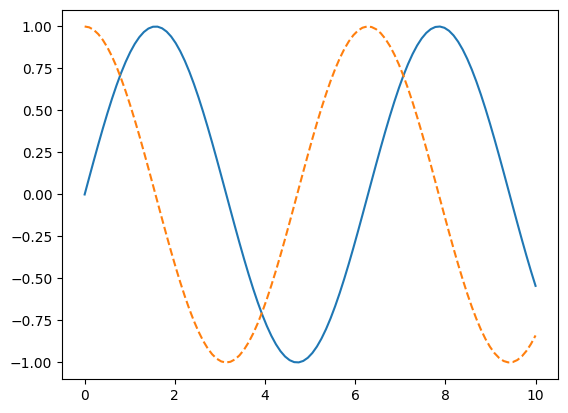

In [11]:
#You can also make multiple lines in one plot.
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x,y1,'-')
plt.plot(x,y2,'--')

Note that we didn't pick the colors, but Matplotlib choose a different color for each line.

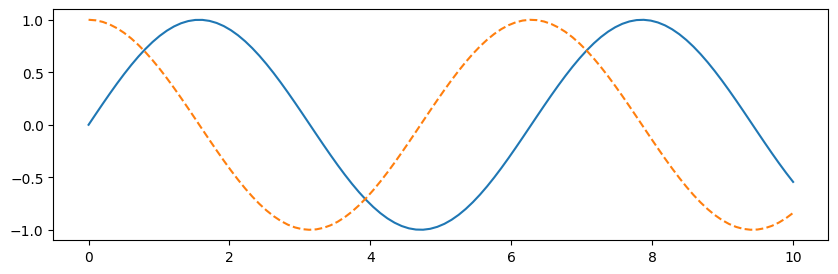

In [13]:
# It is also possible to adjust the size of the image to fit your drawing better.
fig = plt.figure(figsize=(10,3)) #figure with 10 inches in width and 6 inches in height
plt.plot(x,y1,'-')
plt.plot(x,y2,'--')

You an save your figures to a File so they can be used in your papers and reports. The command

```Python
fig.savefig('MyFigure.png')
```

will save your figure into a `.png` file in your current folder. You can open and manipulate the figure with any image editing program. The following figure formats are typically supported by matplotlib 

- 'eps': 'Encapsulated Postscript',
- 'jpeg': 'Joint Photographic Experts Group',
- 'jpg': 'Joint Photographic Experts Group',
- 'pdf': 'Portable Document Format',
- 'pgf': 'PGF code for LaTeX',
- 'png': 'Portable Network Graphics',
- 'ps': 'Postscript',
- 'raw': 'Raw RGBA bitmap',
- 'rgba': 'Raw RGBA bitmap',
- 'svg': 'Scalable Vector Graphics',
- 'svgz': 'Scalable Vector Graphics',
- 'tif': 'Tagged Image File Format',
- 'tiff': 'Tagged Image File Format'

To make your plots more presentable, you can adjust most aspects of the plot to ensure they are paper ready!

Text(0, 0.5, 'y2')

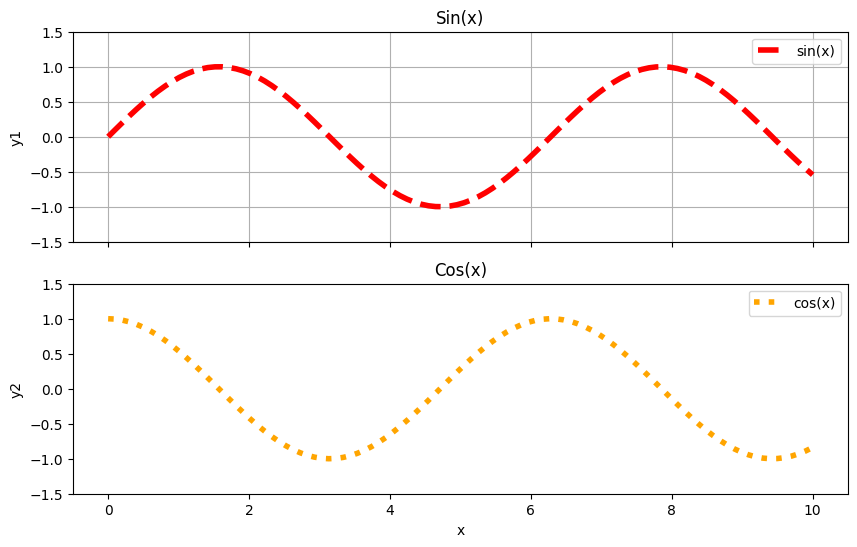

In [32]:
fig, ax = plt.subplots(2,1,figsize=(10,6), sharex = True) #create a plot with 2 rows and 1 column and size (10,6) sharing the x axis
ax[0].plot(x,y1, ls='--', c='red',lw=4, label='sin(x)')
ax[0].legend()
ax[0].set_ylim([-1.5,1.5])
ax[0].set_title('Sin(x)')
ax[0].set_ylabel('y1')
ax[0].grid()

ax[1].plot(x,y2, ls=':',c='orange',lw=4, label='cos(x)')
ax[1].legend()
ax[1].set_ylim([-1.5,1.5])
ax[1].set_xlim([-0.5,10.5])
ax[1].set_title('Cos(x)')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y2')

## Scatter Plots

When dealing with multiple variables, it is always useful to visualize the relation between variables and identify potential correlations. Matplotlib offers a powerful tool to plot and visualize relationships between variables. 

Text(0, 0.5, 'Variable 2')

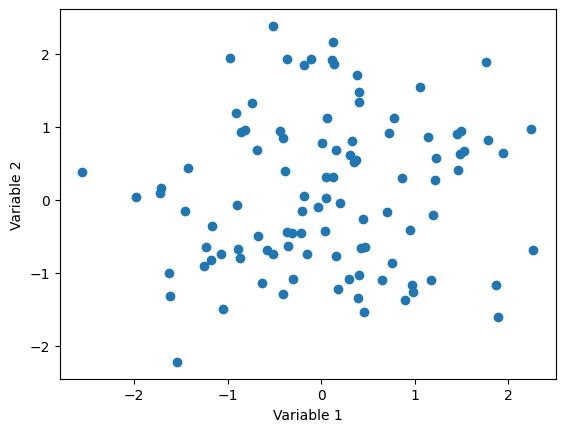

In [34]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
plt.scatter(x, y)
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')

Text(0, 0.5, 'Variable 2')

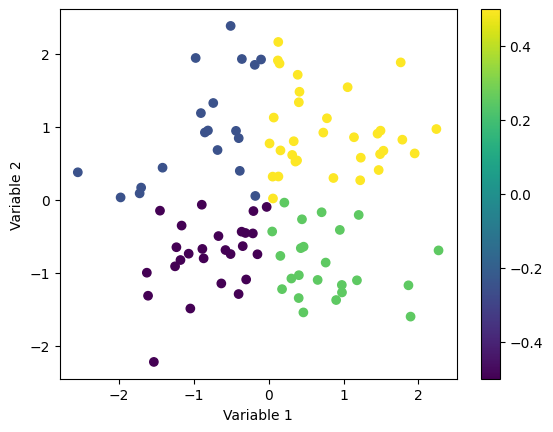

In [50]:
#you can also add a new variable using colors in the plot
z = np.zeros_like(x)
for i in range(len(z)):
    if (x[i]>0) and (y[i]>0):
        z[i] = 0.5
    elif (x[i]>0) and (y[i]<0):
        z[i] = 0.25
    elif (x[i]==0) and (y[i]==0):
        z[i] = 0.0
    elif (x[i]<0) and (y[i]>0):
        z[i] = -0.25
    elif (x[i]<0) and (y[i]<0):
        z[i] = -0.5

plt.scatter(x, y, c = z, cmap='viridis')
plt.colorbar();  # show color scale
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')

## Error bars

Error bars allow you to visualize error is on or more dimensions in your data. 

<ErrorbarContainer object of 3 artists>

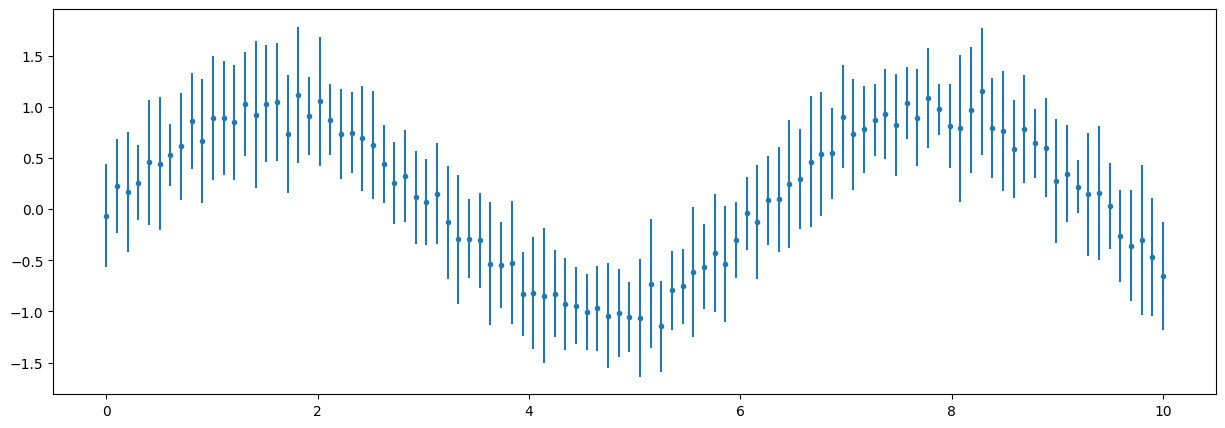

In [6]:
plt.figure(figsize=(15,5))
x = np.linspace(0,10,100)
y = np.sin(x) + 0.1*np.random.randn(100)
error = np.random.randn(100)*0.1+0.5
plt.errorbar(x,y,yerr=error, fmt='.')


Text(0.5, 1.0, 'A plot with error bars')

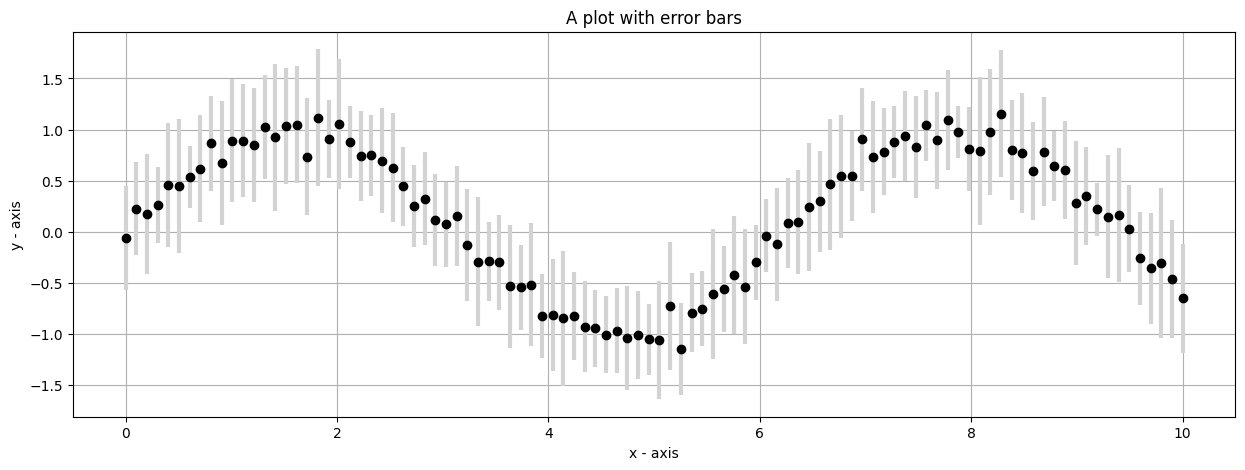

In [7]:
# A better looking plot can be achieved with some modification
plt.figure(figsize=(15,5))
plt.errorbar(x, y, yerr=error, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);
plt.grid()
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('A plot with error bars')

It is ofter desirable to show error bars as continuous measures. Though there is no ready function to make this kind of plots, it is possible to generate continuous error bars using just a few functions

Text(0.5, 1.0, 'A plot with continuous error bars')

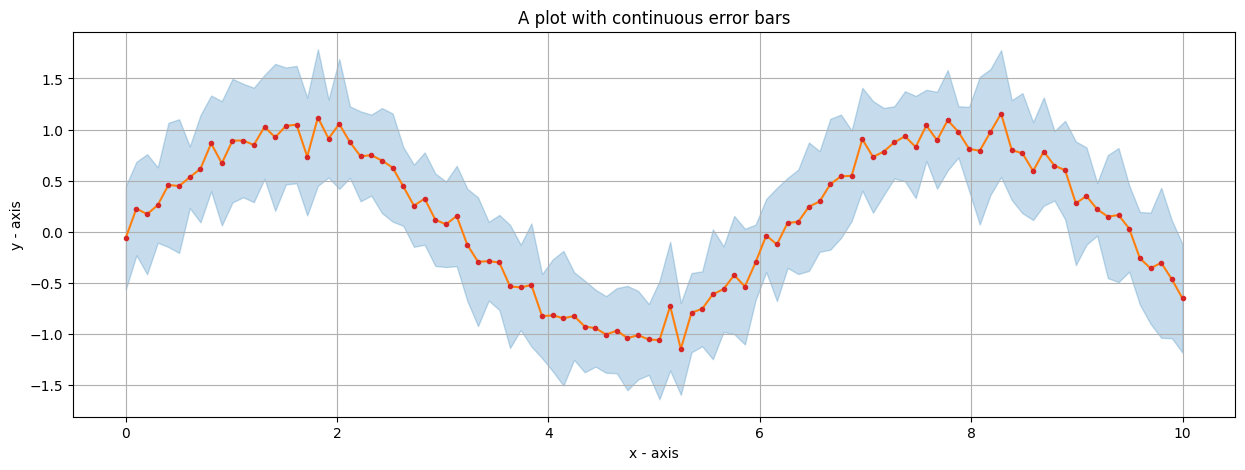

In [8]:
plt.figure(figsize=(15,5))
plt.plot(x,y, color= 'tab:orange')
plt.plot(x,y,'.', color= 'tab:red')
plt.fill_between(x,y-error, y+error, alpha=0.25, color='tab:blue') #alpha controls the transparency of the filled area
plt.grid()
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('A plot with continuous error bars')

## Histograms

Visualizing the distribution of your data is an important step before applying any analysis as many statistical analysis techniques requiere the data to have normal distribution. Matplotlib includes methods to plot histograms directly

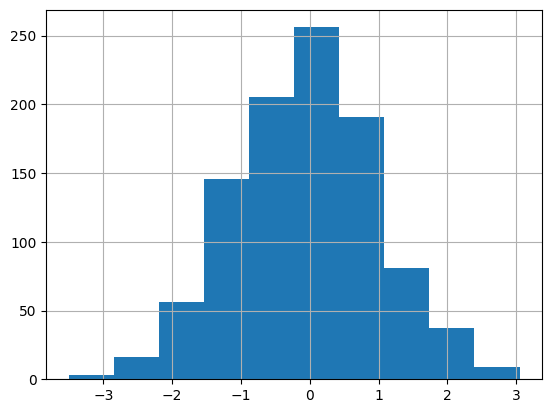

In [90]:
import numpy as np
import matplotlib.pyplot as plt
data = np.random.randn(1000) #random data with normal distribution and zero mean       
plt.hist(data);
plt.grid()

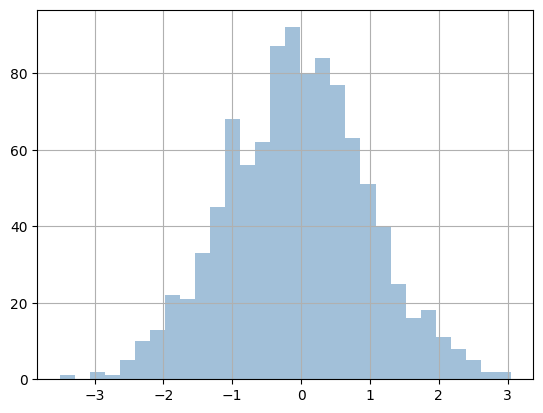

In [93]:
plt.hist(data, bins=30, alpha=0.5,histtype='stepfilled', color='steelblue',edgecolor='none');
plt.grid()

You can pass arguments to the function using a dictionary, this is useful if you need to reuse the arguments. 

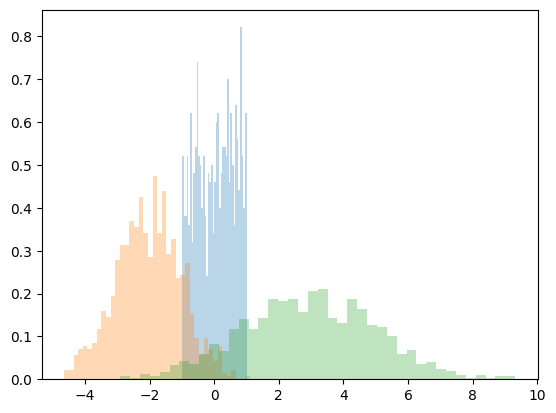

In [106]:
x1 = np.random.uniform(-1,1,1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', density=True, alpha=0.3, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

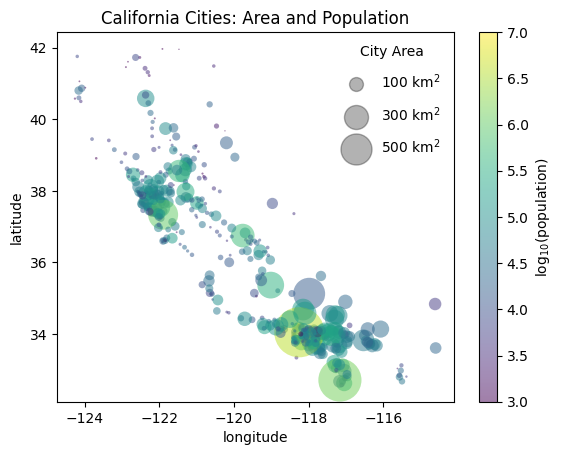

In [109]:
# A more complex example showing population density of cities in California
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

## 3D plots
Matplotlib can be used to generate complex 3d plots. In this case, using interactive visualization can be useful to alter the viewpoint of your plot. 

Warning: 3D plots can be computationally intensive and quickly consume your computer's graphical resources. I suggest saving your progress before creating the plots and making one plot at a time. 

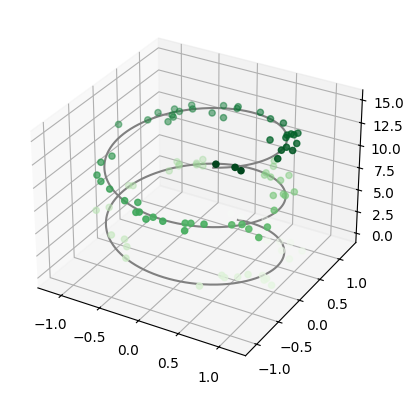

In [110]:
#when creating 3d plots, you need to import a new library called mplot3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

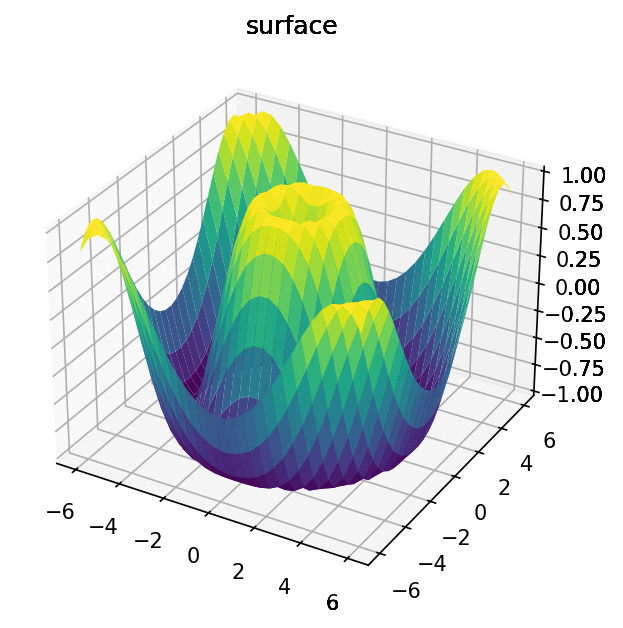

In [134]:
#plotting a surface
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)


ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');
plt.show()

I personally often use `seaborn`, as it tighly integrated with Pandas and generates professional looking plots with the default parameters. 

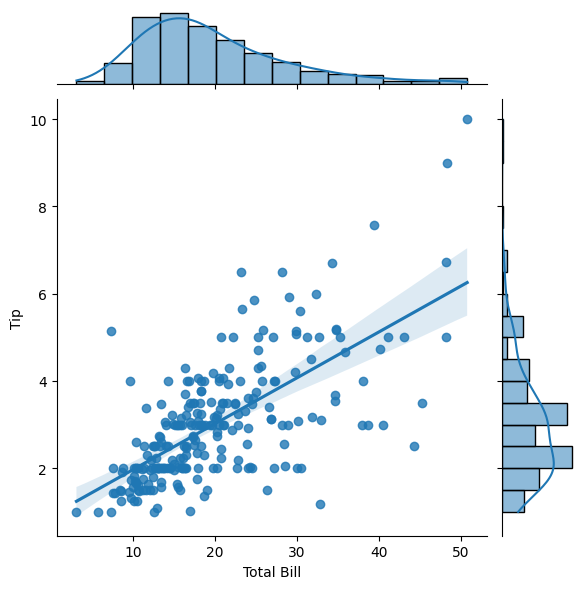

In [157]:
import seaborn as sns
tips = sns.load_dataset('tips') #load a dataset
g = sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg') #applies a regression line
g.set_axis_labels(xlabel='Total Bill', ylabel='Tip')